In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
import seaborn as sns
import scipy

from numpy.linalg import matrix_power
from numpy.linalg import solve

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

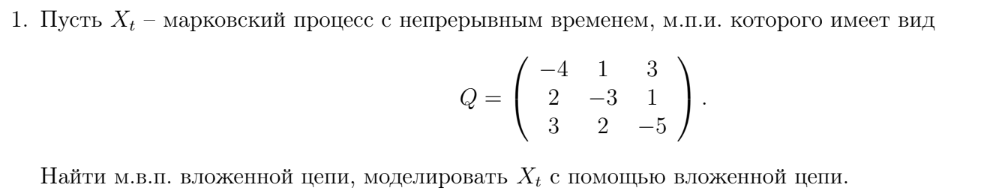

In [29]:
n = 3
Q = np.array([[-4, 1, 3],
              [2, -3, 1],
              [3, 2, -5]])

P = []
for i in range(n):
    tmp = []
    for j in range(n):
        if i == j:
            tmp.append(0)
        else:
            tmp.append(-Q[i, j]/Q[i, i])
    P.append(tmp)
    
P = np.array(P)
print(P)

[[0.         0.25       0.75      ]
 [0.66666667 0.         0.33333333]
 [0.6        0.4        0.        ]]


2  за время:  2.3606570293422537
время процесса:  2.3606570293422537
----
1  за время:  0.8619204484234448
время процесса:  3.2225774777656984
----
0  за время:  2.306656926082188
время процесса:  5.5292344038478864
----
2  за время:  1.8229664993596162
время процесса:  7.352200903207502
----
1  за время:  0.5252617298172307
время процесса:  7.8774626330247335
----
2  за время:  1.7608412795433188
время процесса:  9.638303912568052
----
0  за время:  1.0897144990604777
время процесса:  10.728018411628529
----
1  за время:  2.3469791448912947
время процесса:  13.074997556519824
----
0  за время:  1.0446929045803093
время процесса:  14.119690461100133
----
2  за время:  1.012877276627669
время процесса:  15.132567737727802
----
0  за время:  0.8035684953539012
время процесса:  15.936136233081703
----
2  за время:  1.4883203744448332
время процесса:  17.424456607526537
----
0  за время:  0.592526474310628
время процесса:  18.016983081837164
----
2  за время:  0.4788000900816227
время проц

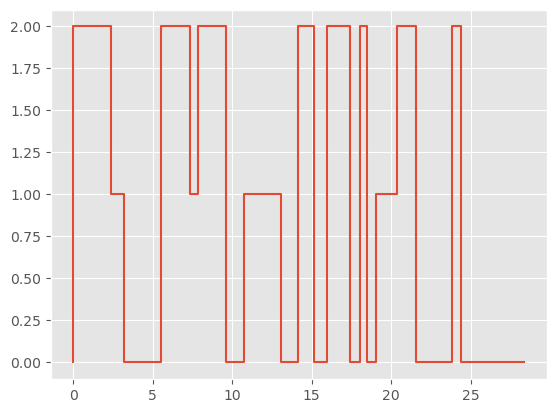

In [98]:
#время
time = 0

#состояния
curr = 0
prev = None

#данные графика
dur = [0]
trace = [0]

for i in range(20):
    prev = curr
    
    p = P[prev]
    curr = int(np.random.choice([0, 1, 2], 1, p=p)[0])
    
    d = st.expon(1/Q[prev, curr]).rvs()
    time += d
    
    dur.append(time)
    trace.append(curr)
    
    print(curr, ' за время: ', d)
    print('время процесса: ', time)
    print('----')
    
plt.step(dur, trace)

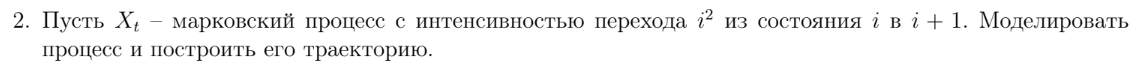

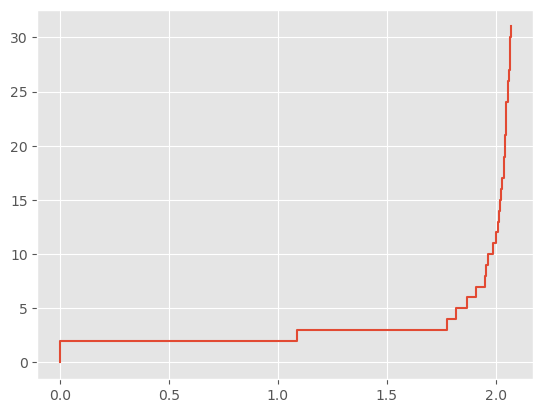

In [24]:
#время
time = 0

trace = [0]
dur = [0]

for i in range(1, 31):
    d = st.expon(scale=(1/i**2)).rvs()
    time += d
    dur.append(time)
    trace.append(i+1)
    
    '''print('из', i, 'в', i+1, 'за время: ', d)
    print('время процесса: ', time)
    print('----')'''
    
plt.step(dur, trace)

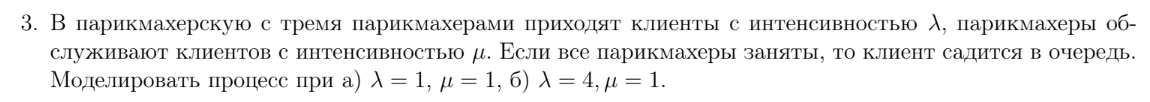

In [30]:
def salon_simulation(l, m):
    #начинаем с состояния, когда все парикмахеры заняты
    curr = 3
    prev = None
    time = 0
    
    trace = [3]
    dur = [0]
    
    
    for i in range(20):
        prev = curr
        dec = st.expon(scale=(1/(3*l))).rvs()
        inc = st.expon(scale=(1/m)).rvs()
        if dec <= inc and curr > 0:
            d = dec
            curr -= 1
        else:
            d = inc
            curr += 1
        time += d
        trace.append(curr)
        dur.append(time)
        
        '''print('из', prev, 'в', curr, 'за время: ', d)
        print('время процесса: ', time)
        print('----')'''
        
        plt.step(dur, trace)

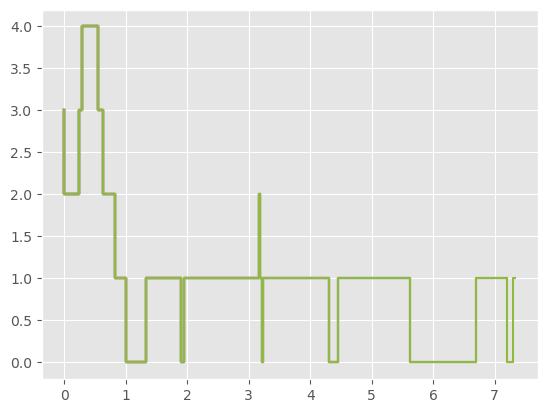

In [32]:
salon_simulation(1, 1)

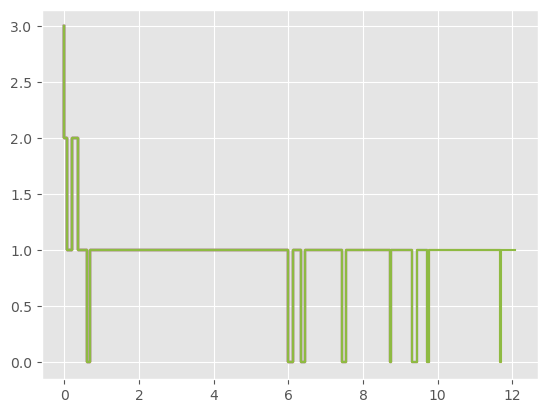

In [34]:
salon_simulation(4, 1)

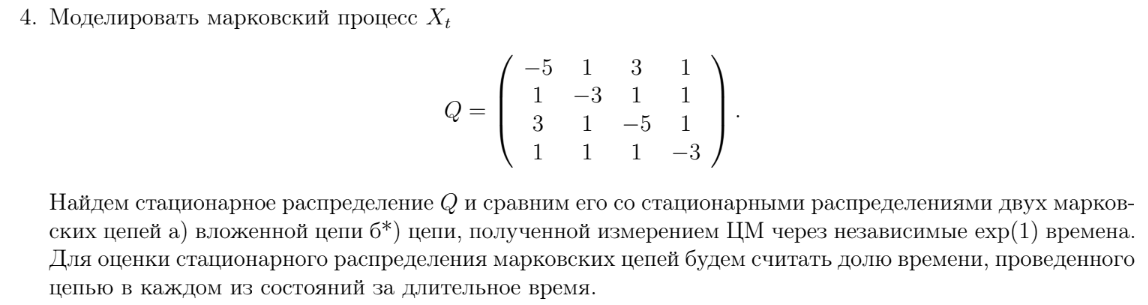

In [38]:
n = 4
Q = np.array([[-5, 1, 3, 1],
              [1, -3, 1, 1],
              [3, 1, -5, 1], 
              [1, 1, 1, -3]])

P = []
for i in range(n):
    tmp = []
    for j in range(n):
        if i == j:
            tmp.append(0)
        else:
            tmp.append(-Q[i, j]/Q[i, i])
    P.append(tmp)
    
P = np.array(P)
print(P)

[[0.         0.2        0.6        0.2       ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.6        0.2        0.         0.2       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]


In [10]:
def stationary_solve(matrix, n):
    matrix = matrix.transpose() - np.identity(n)
    
    #В силу стохастичности матрица вырождена, поэтому удалим одну строку и один столбец
    #pi1 = 1
    
    matrix = np.matrix(np.delete(matrix, 0, 0))
    b = -matrix[:, 0]
    matrix = np.matrix(np.delete(matrix, 0, 1))
    
    solution = np.linalg.solve(matrix, b)
    solution = np.insert(solution, 0, 1)
    solution /= np.sum(solution)
    
    return solution

print(stationary_solve(P, n)[0])

[[0.3125 0.1875 0.3125 0.1875]]


In [14]:
vals, vects = np.linalg.eig(Q.T)
i = np.argmin(np.abs(vals - 1))
pi = np.abs(vects[:, i])
pi /= pi.sum()

print(pi)

[0.25 0.25 0.25 0.25]


In [40]:
#Оценка стационарности
durations = [0, 0, 0, 0]

time = 0

#состояния
curr = 0
prev = None

for i in range(1000):
    prev = curr
    
    p = P[prev]
    curr = int(np.random.choice([0, 1, 2, 3], 1, p=p)[0])
    
    d = st.expon(scale=(1/Q[prev, curr])).rvs()
    durations[prev] += d
    time += d
    
durations = np.array(durations)
print(durations/time)

[0.25602039 0.26552136 0.23029073 0.24816751]
